### load the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Absenteeism_data.csv')

In [4]:
data = df.copy()

In [5]:
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [6]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [7]:
display(data.head())

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [9]:
type(data)

pandas.core.frame.DataFrame

### data preprocessing : Reason for Absence

In [10]:
data.drop('ID', axis=1, inplace=True)

In [11]:
data.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


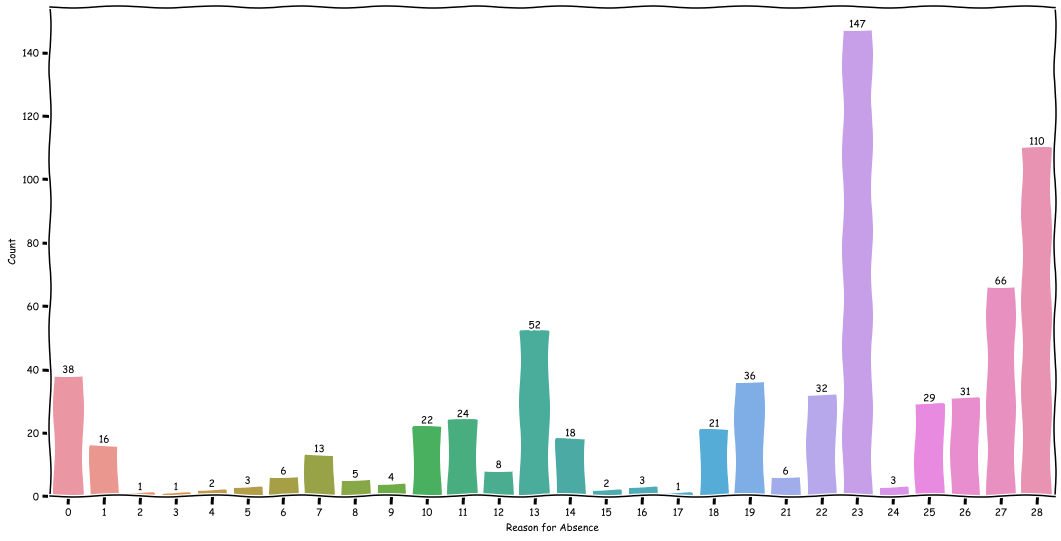

In [12]:
with plt.xkcd():
    sns.barplot(data=data['Reason for Absence'].value_counts().reset_index(), x='index', y='Reason for Absence')
    fig = plt.gcf()
    ax = plt.gca()
    fig.set_size_inches(18,9)
    for i in ax.containers:
        plt.bar_label(i)
    plt.xlabel('Reason for Absence')
    plt.ylabel('Count');

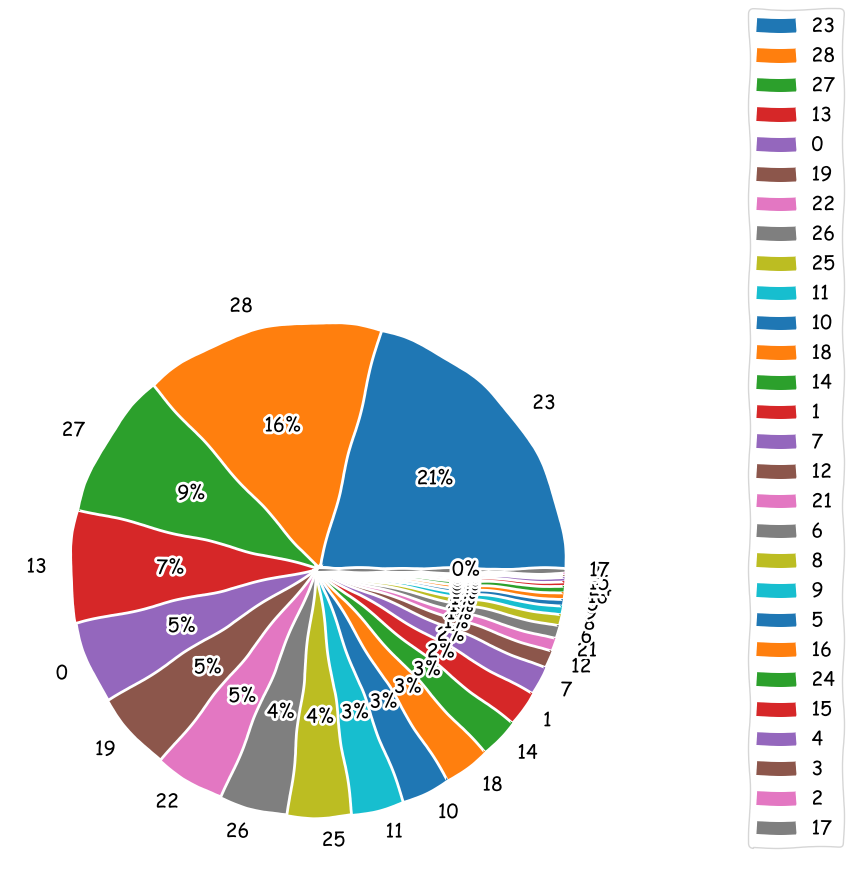

In [13]:
with plt.xkcd():
    plt.pie(data['Reason for Absence'].value_counts().reset_index()['Reason for Absence'], labels=data['Reason for Absence'].value_counts().reset_index()['index'],autopct='%1.0f%%')
    fig = plt.gcf()
    fig.set_size_inches(18,8)
    plt.legend(loc=[1.2,0.05]);

In [14]:
def absence_reason(x):
    if x in np.arange(0,15):
        return '1'
    elif x in np.arange(15, 18):
        return '2'
    elif x in np.arange(18, 22):
        return '3'
    elif x in np.arange(22, 29):
        return '4'

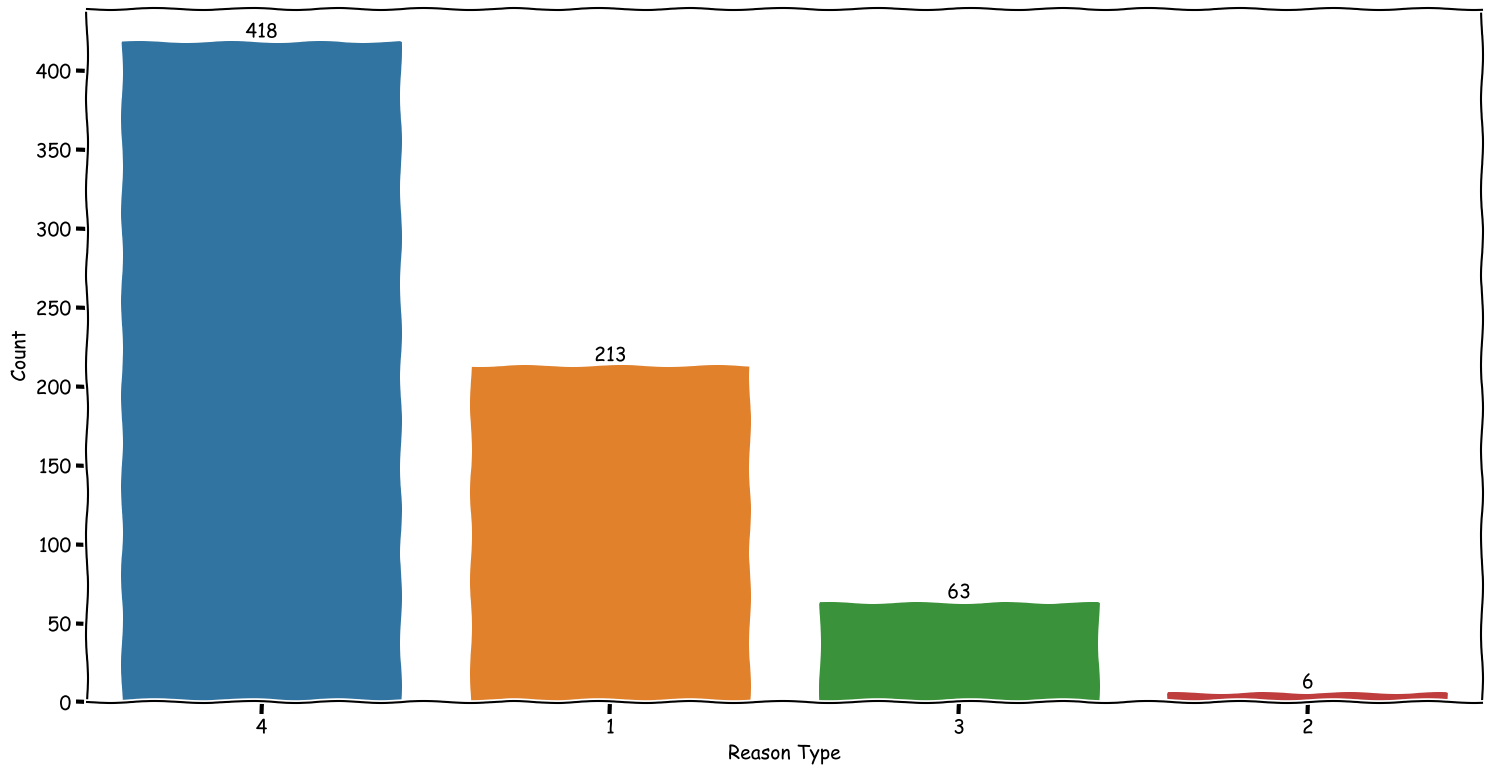

In [15]:
with plt.xkcd():
    sns.barplot(data=data['Reason for Absence'].apply(absence_reason).value_counts().reset_index(), x='index',y='Reason for Absence')
    fig = plt.gcf()
    ax = plt.gca()
    fig.set_size_inches(18,9)
    for i in ax.containers:
        plt.bar_label(i)
    plt.xlabel('Reason Type')
    plt.ylabel('Count');

In [16]:
data['Reason for Absence'] = data['Reason for Absence'].apply(absence_reason)

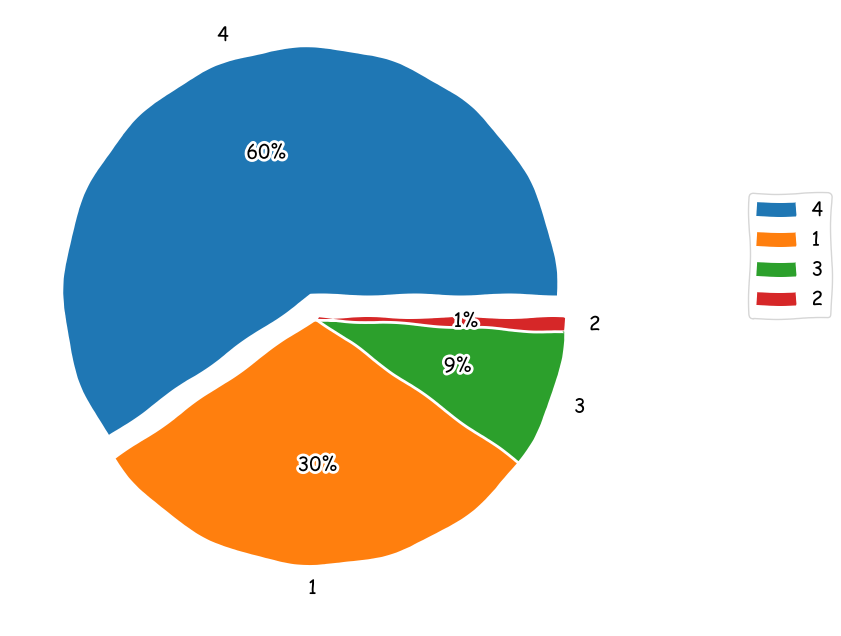

In [17]:
with plt.xkcd():
    plt.pie(data['Reason for Absence'].value_counts().reset_index()['Reason for Absence'], labels=data['Reason for Absence'].value_counts().reset_index()['index'],autopct='%1.0f%%', explode=[0.1, 0,0,0])
    fig = plt.gcf()
    fig.set_size_inches(18,8)
    plt.legend(loc=[1.2,0.5])

### reorder the columns

In [18]:
data.columns

Index(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [19]:
reorder = ['Education', 'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index']

In [20]:
data[reorder].head()

,Education,Children,Pets,Absenteeism Time in Hours,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index
0,1,2,1,4,4,07/07/2015,289,36,33,239.554,30
1,1,1,0,0,1,14/07/2015,118,13,50,239.554,31
2,1,0,0,2,4,15/07/2015,179,51,38,239.554,31
3,1,2,0,4,1,16/07/2015,279,5,39,239.554,24
4,1,2,1,2,4,23/07/2015,289,36,33,239.554,30


### data preprocessing : Date

In [21]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [22]:
data['Month'] = data['Date'].apply(lambda x: x.month)

In [23]:
data['day_of_week'] = data['Date'].apply(lambda x: x.dayofweek)

In [24]:
data.drop('Date', axis=1, inplace=True)

### data preprocessing : Education

In [25]:
data['Education'] = data['Education'].astype('category')

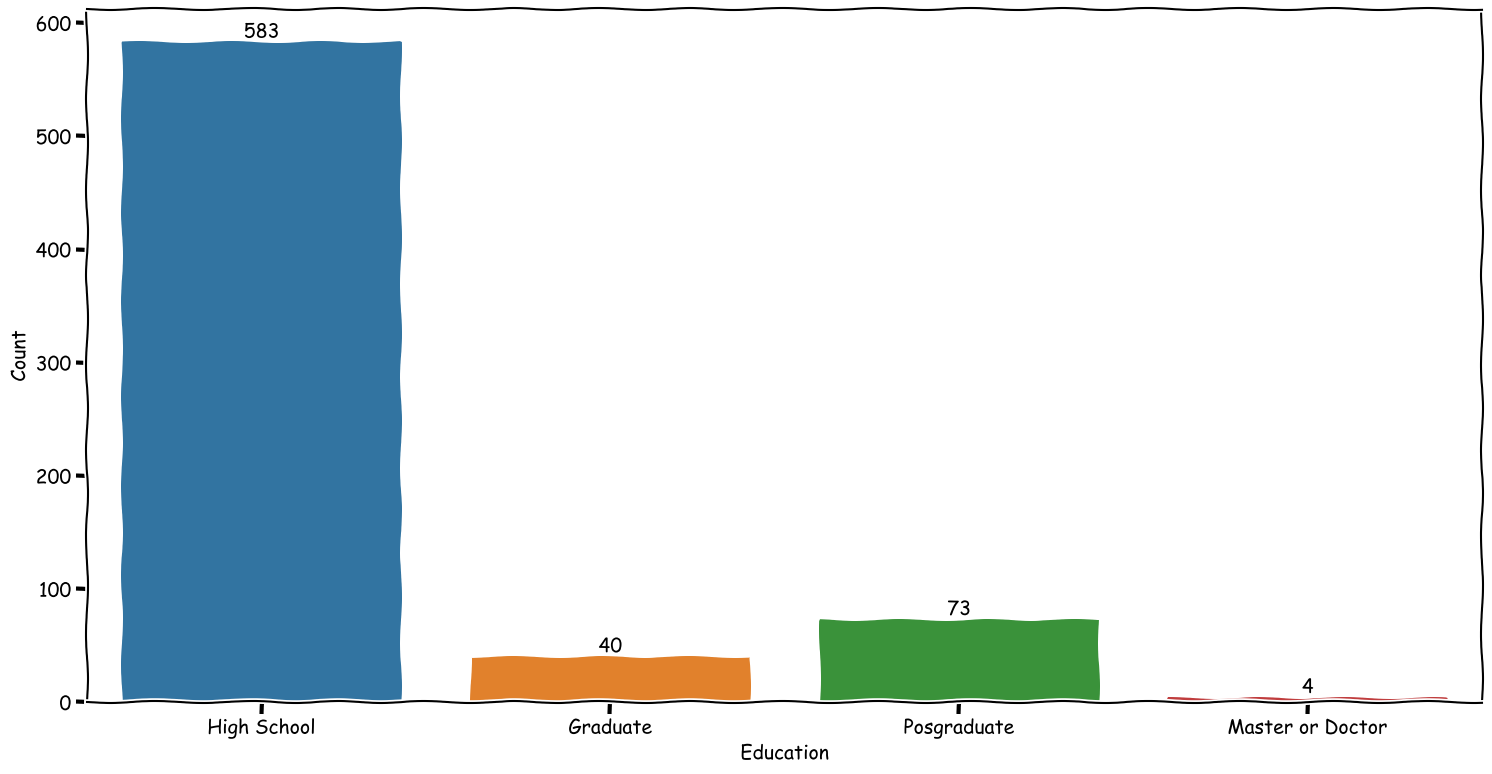

In [26]:
with plt.xkcd():
    sns.barplot(data=data['Education'].value_counts().reset_index(), x='index', y='Education')
    fig = plt.gcf()
    ax = plt.gca()
    fig.set_size_inches(18,9)
    for i in ax.containers:
        plt.bar_label(i)
    plt.xlabel('Education')
    plt.ylabel('Count')
    ax.set_xticklabels(['High School', 'Graduate', 'Posgraduate', 'Master or Doctor'])

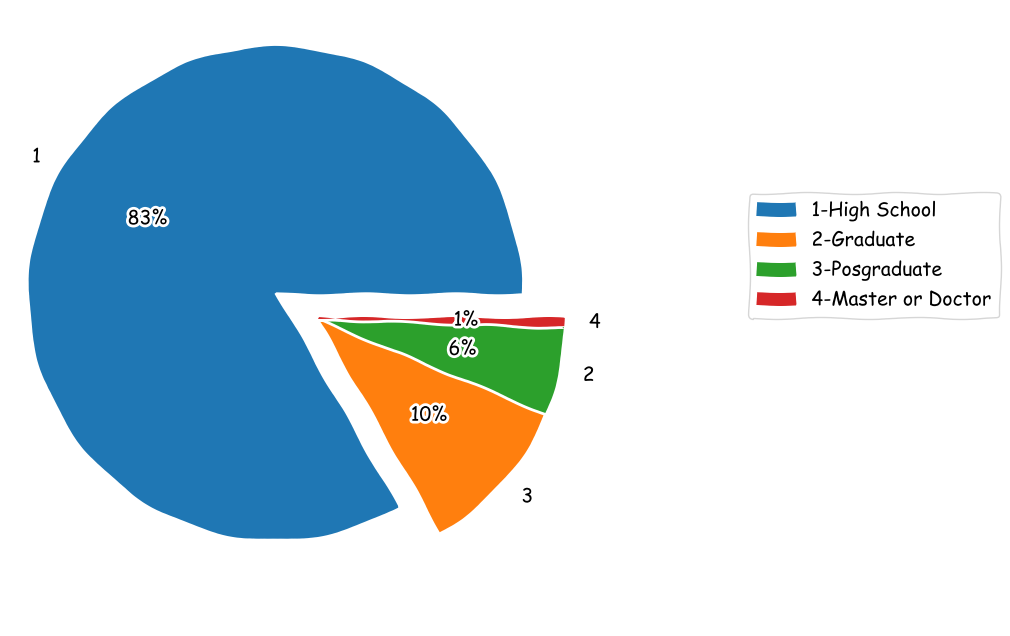

In [27]:
with plt.xkcd():
    plt.pie(data['Education'].value_counts().reset_index()['Education'], labels=data['Education'].value_counts().reset_index()['index'],autopct='%1.0f%%', explode=[0.2, 0,0,0])
    fig = plt.gcf()
    fig.set_size_inches(18,8)
    plt.legend(['1-High School', '2-Graduate', '3-Posgraduate', '4-Master or Doctor'], loc=[1.2,0.5]);

In [28]:
def combine_education(x):
    if x == 1:
        return 0
    else:
        return 1

In [29]:
data['Education']=data['Education'].apply(combine_education)

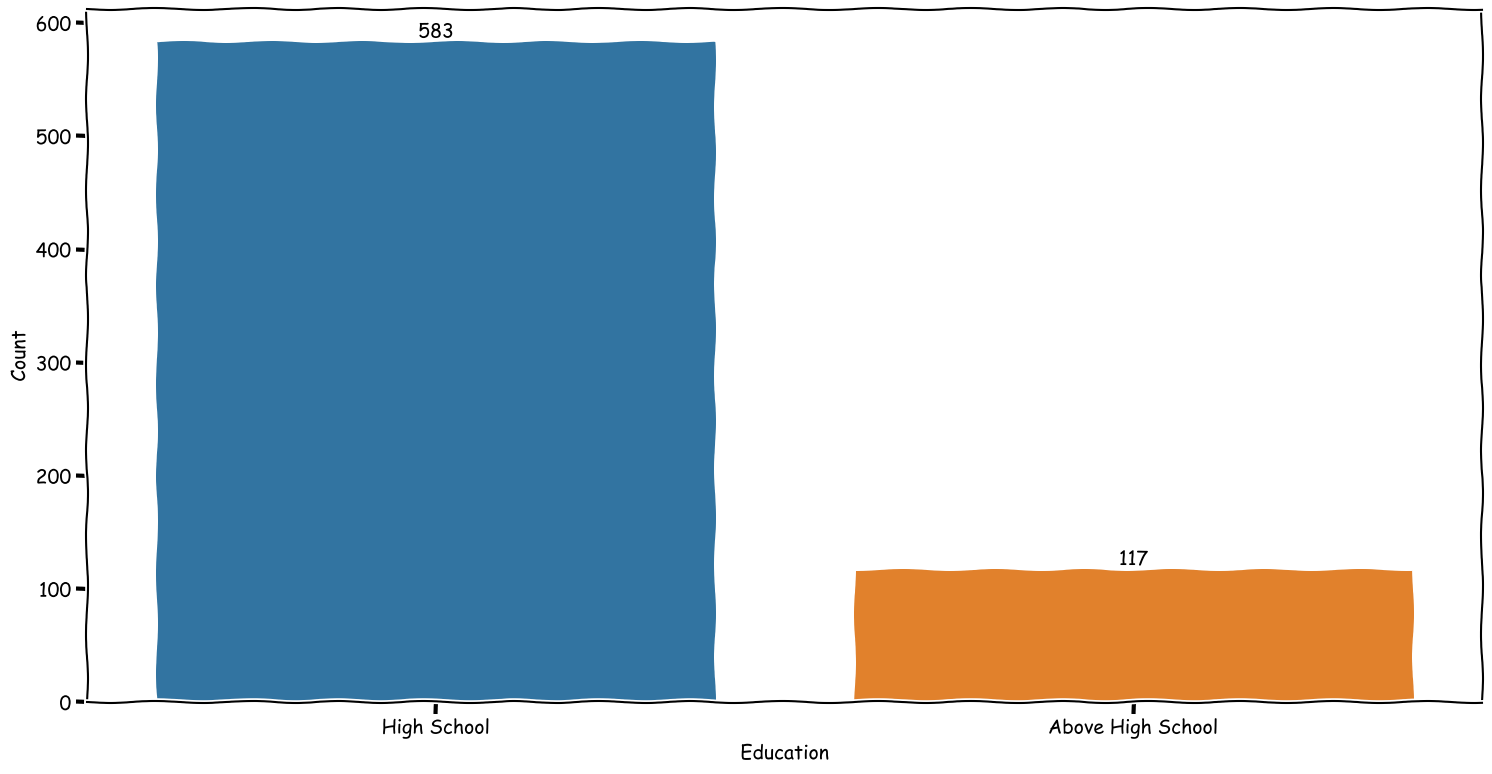

In [30]:
with plt.xkcd():
    sns.barplot(data=data['Education'].value_counts().reset_index(), x='index', y='Education')
    fig = plt.gcf()
    ax = plt.gca()
    fig.set_size_inches(18,9)
    for i in ax.containers:
        plt.bar_label(i)
    plt.xlabel('Education')
    plt.ylabel('Count')
    ax.set_xticklabels(['High School', 'Above High School'])

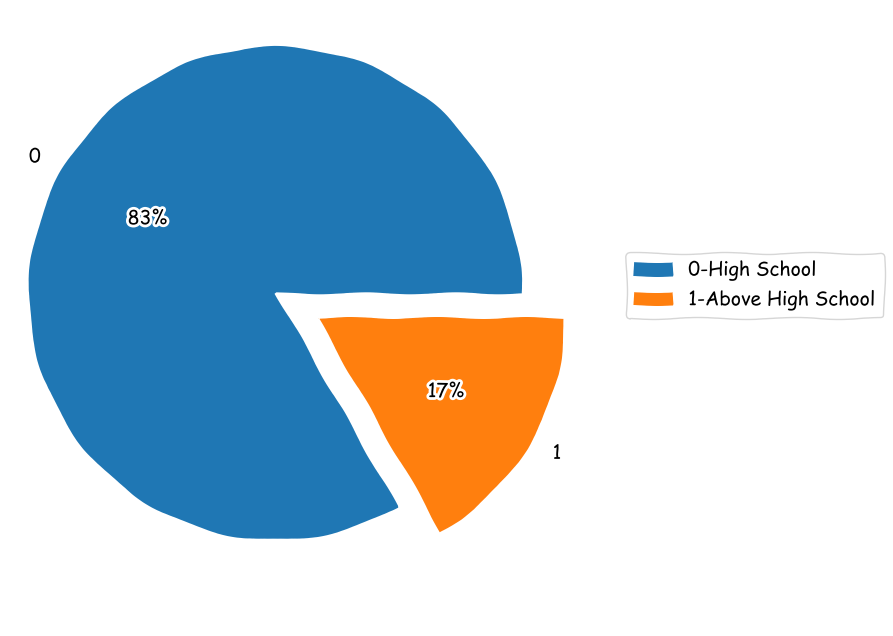

In [31]:
with plt.xkcd():
    plt.pie(data['Education'].value_counts().reset_index()['Education'], labels=data['Education'].value_counts().reset_index()['index'],autopct='%1.0f%%', explode=[0.2, 0])
    fig = plt.gcf()
    fig.set_size_inches(18,8)
    plt.legend(['0-High School', '1-Above High School'], loc=[1,0.5])

In [32]:
final_data = pd.get_dummies(data)

In [33]:
final_data.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,day_of_week,Reason for Absence_1,Reason for Absence_2,Reason for Absence_3,Reason for Absence_4
0,289,36,33,239.554,30,0,2,1,4,7,1,0,0,0,1
1,118,13,50,239.554,31,0,1,0,0,7,1,1,0,0,0
2,179,51,38,239.554,31,0,0,0,2,7,2,0,0,0,1
3,279,5,39,239.554,24,0,2,0,4,7,3,1,0,0,0
4,289,36,33,239.554,30,0,2,1,2,7,3,0,0,0,1


In [34]:
final_data.to_csv('final_data.csv', index=False)